In [1]:
#import pandas
#excel_data_df = pandas.read_excel('train.xlsx', sheet_name='Train')
#print(excel_data_df)
#print('Excel Sheet to CSV:n', excel_data_df.to_csv(index=False))
#print(excel_data_df.columns.ravel())
# Импортируем Pandas

    # Подключаем библиотеку Pandas
import pandas as pd
import pathlib 
from pathlib import Path

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#Получаем строку, содержащую путь к рабочей директории:
work_path = pathlib.Path.cwd()
 
# сохраним путь к csv файлу в переменной data_path 
train_path = Path(work_path, 'train.csv')
sample_path = Path(work_path,'sample_submission.csv')
    
# Загружаем данные из csv файла в переменную data
data_train = pd.read_csv(train_path,index_col='PassengerId')
data_sample = pd.read_csv(sample_path)
 
# Выведем первые 10 строк из прочитанного файла на экран
#data_sample.head(100)
#data_train.head(100)
#data_train[data_train.Cabin != data_train.Cabin.notnull()]
print('Основная информация о данных')
data_train.head()
#data_train.isna()
#data_train.describe()
#PassengerId

Основная информация о данных


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [3]:
#Проверяем данные на наличие пустых ячеек в колонках.
data_train['Sex'].isnull().sum()

0

In [4]:
data_train['Age'].isnull().sum()

3292

In [5]:
data_train['Pclass'].isnull().sum()

0

In [6]:
data_train['Fare'].isnull().sum()

134

In [7]:
#Удалим нулевые значения и создадим таблицу с не используемыми столбцами в дальнейших вычислениях.
#Давайте посмотрим, как теперь выглядит наш набор данных.
df_train = data_train.dropna(subset= ['Fare', 'Age'])
dt = df_train.drop(columns=['Ticket', 'Cabin', 'Fare'])
dt

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
2,0,3,"Owens, Kenneth",male,0.33,1,2,S
3,0,3,"Kramer, James",male,19.00,0,0,S
4,1,3,"Bond, Michael",male,25.00,0,0,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,S
6,0,3,"Conway, Jose",male,7.00,0,0,S
...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,C
99996,0,2,"Brown, Herman",male,66.00,0,0,S
99997,0,3,"Childress, Charles",male,37.00,0,0,S


In [8]:
dt.describe()

,Survived,Pclass,Age,SibSp,Parch
count,96579.000000,96579.000000,96579.000000,96579.000000,96579.000000
mean,0.428250,2.106203,38.355244,0.398337,0.455244
std,0.494828,0.837866,18.313897,0.864081,0.951893
min,0.000000,1.000000,0.080000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000
50%,0.000000,2.000000,39.000000,0.000000,0.000000
75%,1.000000,3.000000,53.000000,1.000000,1.000000
max,1.000000,3.000000,87.000000,8.000000,9.000000


Количество мужчин и женщин ехало на корабле
male      54134
female    42445
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='Counts for Sex'>

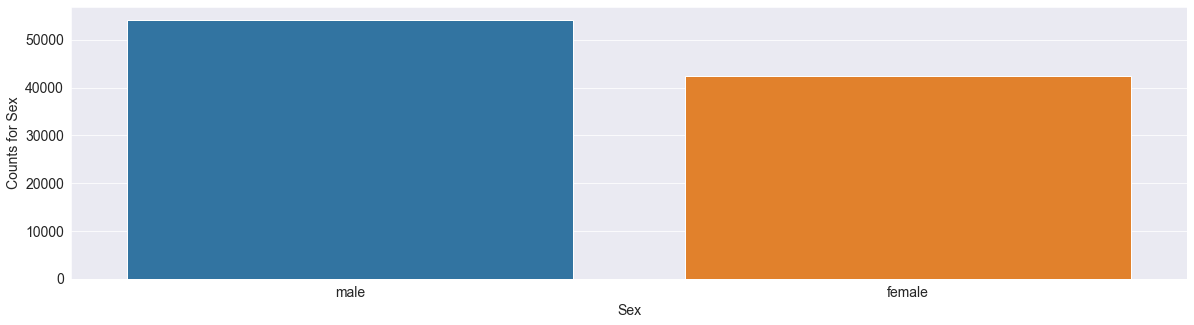

In [9]:
#Количество мужчин и женщин ехало на корабле?
print('Количество мужчин и женщин ехало на корабле')
print(dt.Sex.value_counts())

#Построим гистограмму соотношения пассажиров по полу.
dt_value_counts = pd.DataFrame(dt['Sex'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['Sex', 'Counts for Sex']
sns.barplot(x='Sex', y='Counts for Sex', data = dt_value_counts)

In [10]:
print('Из гистограммы видно, что большинство пассажиров на корабле были мужчины.')

Из гистограммы видно, что большинство пассажиров на корабле были мужчины.


Доля выживших пассажиров
          Pclass   Name    Sex    Age  SibSp  Parch  Embarked
Survived                                                     
0          55219  55219  55219  55219  55219  55219     55093
1          41360  41360  41360  41360  41360  41360     41239
42.83 %


<AxesSubplot:xlabel='Survived', ylabel='Counts for Survived'>

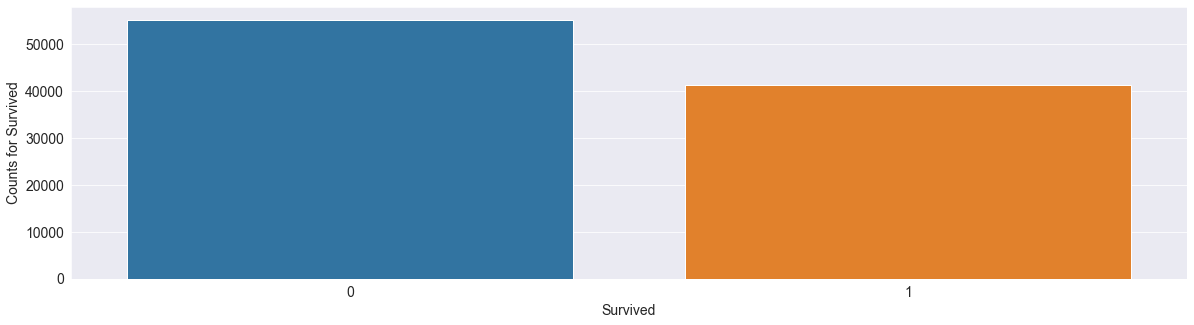

In [11]:
#Определим какой части пассажиров удалось выжить и посчитаем долю выживших пассажиров. 
print('Доля выживших пассажиров')
mask = dt['Survived'] == 1
newdata=dt[mask]

print(dt.groupby('Survived').count())
                                        
onePercentTotal=dt.Survived.count()/100
survived=dt.Survived.sum()

#Ответ представлен в процентах округленный до двух знаков после запятой.
print(round(survived/onePercentTotal,2),'%')


dt_value_counts = pd.DataFrame(dt['Survived'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['Survived', 'Counts for Survived']
sns.barplot(x='Survived', y='Counts for Survived', data = dt_value_counts)

In [12]:
print('Из гистограммы видно, что большая часть пассажиров погибла во время кораблекрушения.')

Из гистограммы видно, что большая часть пассажиров погибла во время кораблекрушения.


Проверим, соотношение спасенных мужчин и женщин, по отношению к погибшим


Text(0.5, 1.0, 'Зависимость выживших от пола')

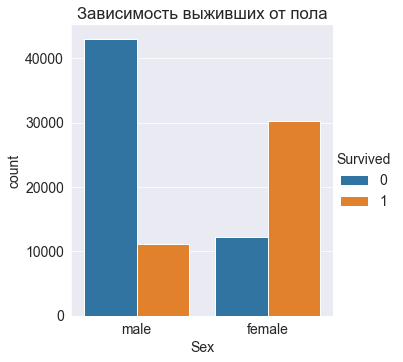

In [13]:
#dt_survived = pd.DataFrame(dt['Survived']==1)
#dt_survived = dt.loc[dt['Survived']==1]['Sex'].value_counts()
#print(dt_survived)
#dt_survived = dt_survived.reset_index()
#dt_survived.columns = ['Survaved Sex', 'Counts for Survaved Sex']
#sns.barplot(x='Survaved Sex', y='Counts for Survaved Sex', data = dt_survived)
print('Проверим, соотношение спасенных мужчин и женщин, по отношению к погибшим')
sns.catplot(x='Sex', data=dt, hue='Survived', kind='count')
plt.title("Зависимость выживших от пола")

In [14]:
print('Из гистограммы видно, что кол-во выживших женщин было больше, чем мужчин.')

Из гистограммы видно, что кол-во выживших женщин было больше, чем мужчин.


Text(0.5, 1.0, 'Соотношение пассажиров по возрасту')

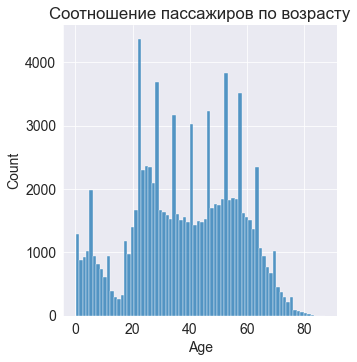

In [15]:
#dt_sex_counts = pd.DataFrame(dt['Sex'].value_counts())
#dt_sex_counts = dt_sex_counts.reset_index()
#dt_sex_counts.columns = ['Sex', 'Counts for Sex']
#dt_sumSex = pd.concat([dt_survived, dt_sex_counts], axis=1)
#print(dt_sumSex)
#dt_sumSex.plot.bar(stacked=True)


#Посмотрим соотношение кол-ва пассажиров по возрасту
sns.displot(dt['Age'])
plt.title("Соотношение пассажиров по возрасту")

In [16]:
print('Больше всего было пассажиров от 20 до 40 лет')

#Посчитаем среднее и медиану возраста пассажиров.
print('Среднее значение и медиана возраста пассажиров')

print(round(dt.Age.mean(),2))
print(round(dt.Age.median(),2))

Больше всего было пассажиров от 20 до 40 лет
Среднее значение и медиана возраста пассажиров
38.36
39.0


Посмотрим распределение пассажиров по сумме супруг + братья и сёстры на борту корабля


<AxesSubplot:xlabel='SibSp', ylabel='counts for SibSp'>

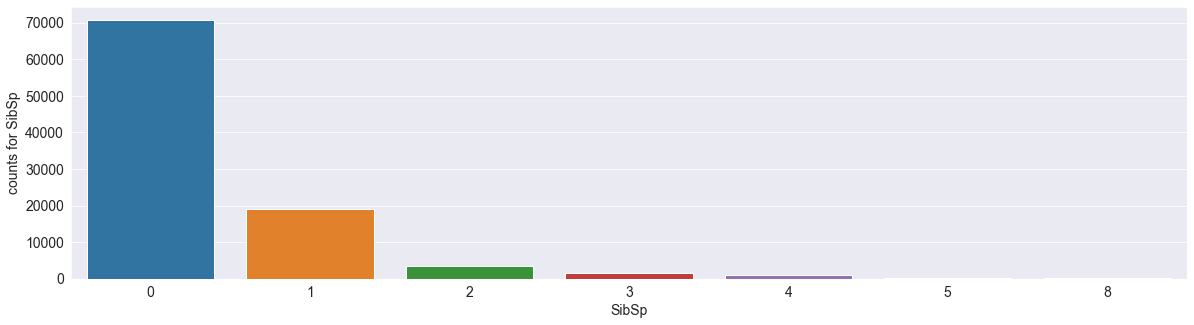

In [17]:
#Посмотрим распределение пассажиров по сумме 'супруг + братья и сёстры на борту корабля'
print('Посмотрим распределение пассажиров по сумме супруг + братья и сёстры на борту корабля')
      
dt_value_counts = pd.DataFrame(dt['SibSp'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['SibSp', 'counts for SibSp']
#dt
sns.barplot(x='SibSp', y='counts for SibSp',   data = dt_value_counts)

Распределение пассажиров по сумме
 'родители + дети на борту'


<AxesSubplot:xlabel='Parch', ylabel='Сounts for Parch'>

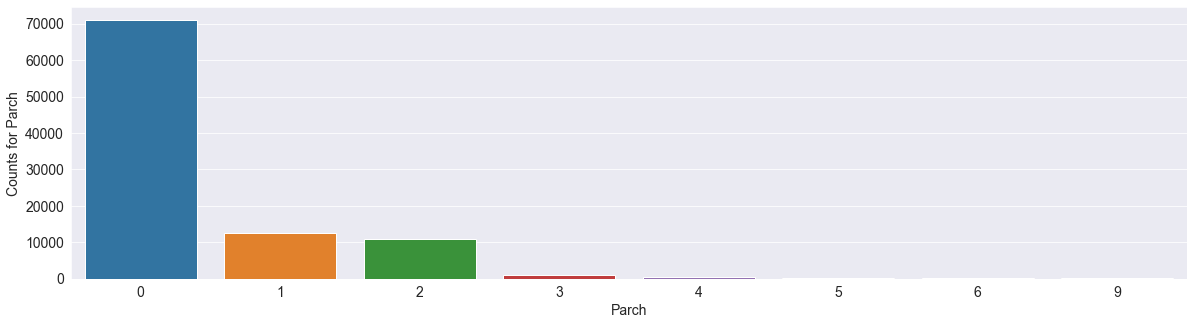

In [18]:
#Посмотрим распределение пассажиров по сумме\n 'родители + дети на борту'
print("Распределение пассажиров по сумме\n 'родители + дети на борту'")
dt_value_counts = pd.DataFrame(dt['Parch'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['Parch', 'Сounts for Parch']
#dt
sns.barplot(x='Parch', y='Сounts for Parch',   data = dt_value_counts)

Распределение пассажиров по пункту отправления


<AxesSubplot:xlabel='Embarked', ylabel='Сounts for Embarked'>

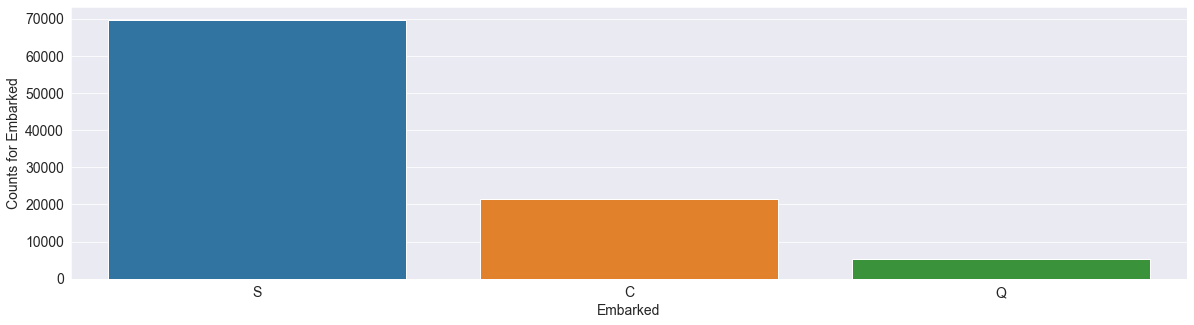

In [19]:
#Посмотрим распределение пассажиров по пункту отправления'
print("Распределение пассажиров по пункту отправления")
dt_value_counts = pd.DataFrame(dt['Embarked'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['Embarked', 'Сounts for Embarked']
#dt
sns.barplot(x='Embarked', y='Сounts for Embarked',   data = dt_value_counts)

In [20]:
print('Большая часть пассажиров отправилась в путешествие из пункта отправления Southampton')

Большая часть пассажиров отправилась в путешествие из пункта отправления Southampton


Распределение пассажиров по классу обслуживания


<AxesSubplot:xlabel='Pclass', ylabel='Сounts for Pclass'>

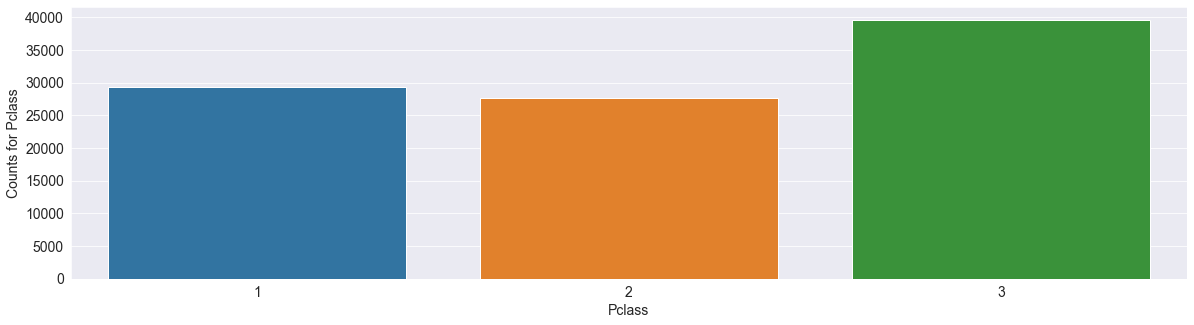

In [21]:
#Посмотрим распределение пассажиров по классу обслуживания'
print("Распределение пассажиров по классу обслуживания")
dt_value_counts = pd.DataFrame(dt['Pclass'].value_counts())
dt_value_counts = dt_value_counts.reset_index()
dt_value_counts.columns = ['Pclass', 'Сounts for Pclass']
#dt
sns.barplot(x='Pclass', y='Сounts for Pclass',   data = dt_value_counts)

In [22]:
print('Подавляющее большинство пассажиров находилось в каютах третьего класса')

Подавляющее большинство пассажиров находилось в каютах третьего класса


Text(0.5, 1.0, 'Распределение пассажиров по полу в каждом классе')

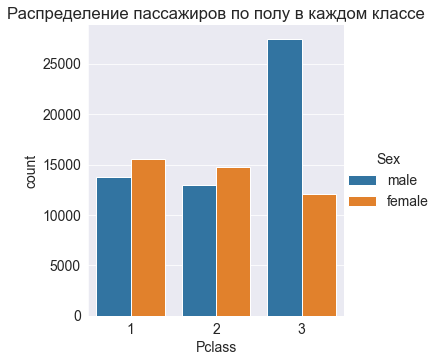

In [23]:
sns.catplot(x='Pclass', data=dt, hue='Sex', kind='count')
plt.title("Распределение пассажиров по полу в каждом классе")

In [24]:
print('Как видно из графика, в третьем классе преимущественно ехали мужчины')

Как видно из графика, в третьем классе преимущественно ехали мужчины


In [25]:
#Посчитаем процент пассажиров по классам среди всех пассажиров.
#Ответ приведен в процентах.
firstClassCount = dt.loc[dt['Pclass']==1].count()
SecondClassCount= dt.loc[dt['Pclass']==2].count()
ThirdClassCount= dt.loc[dt['Pclass']==3].count()
allCount = dt.count()

print('Процент пассажиров 1-го класса ', round(firstClassCount['Pclass']/allCount['Pclass']*100,2),'%')
print('Процент пассажиров 2-го класса ', round(SecondClassCount['Pclass']/allCount['Pclass']*100,2),'%')
print('Процент пассажиров 3-го класса ', round(ThirdClassCount['Pclass']/allCount['Pclass']*100,2),'%')

Процент пассажиров 1-го класса  30.35 %
Процент пассажиров 2-го класса  28.67 %
Процент пассажиров 3-го класса  40.97 %


In [26]:
print('Из процентного соотношения,так же подтверждается, что большенство пассажиров ехало в третим классом.')

Из процентного соотношения,так же подтверждается, что большенство пассажиров ехало в третим классом.


Определим соотношение выживших по полу и классу


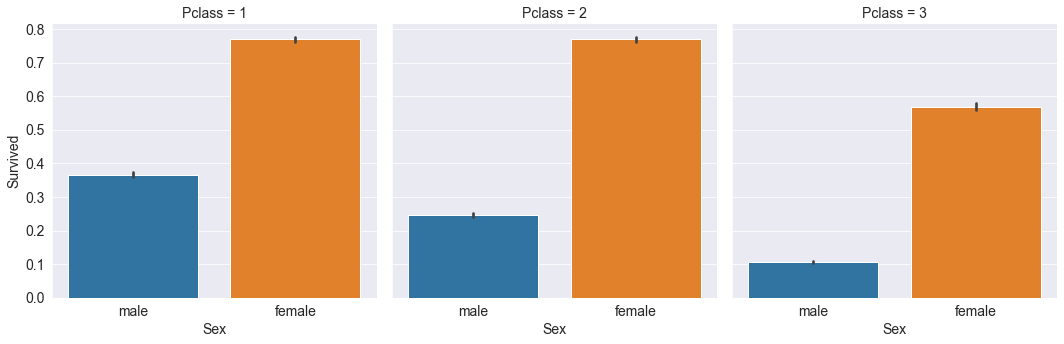

In [27]:
#Определим соотношение выживших по полу и классу
print('Определим соотношение выживших по полу и классу')
sns.catplot(x='Sex', y='Survived', col='Pclass', data=dt, kind='bar')

In [28]:
print('Данные показывают, что большенство выживших было женщин преимущественно первого и второго класса, а из мужчин - путешествующие первым классом.')

Данные показывают, что большенство выживших было женщин преимущественно первого и второго класса, а из мужчин - путешествующие первым классом.


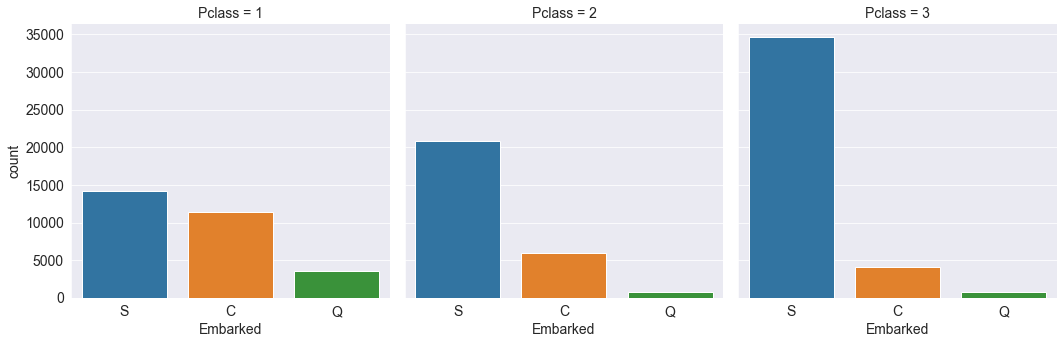

In [29]:
#Посмотрим кол-во выжить у пассажиров из различных портов отправления.
sns.catplot(x='Embarked', col='Pclass', data=dt, kind='count')

In [30]:
print('По каждому из классов обслуживания больше всего садилось в порту Southampton')

По каждому из классов обслуживания больше всего садилось в порту Southampton


Определим кол-во выживших взависимости от места посадки


<AxesSubplot:xlabel='Embarked', ylabel='Сounts for Embarked'>

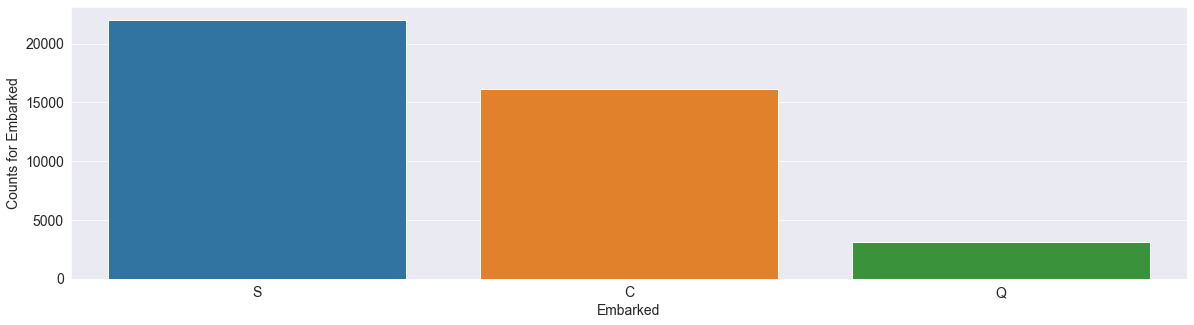

In [31]:
print('Определим кол-во выживших взависимости от места посадки')
#sns.catplot(x='Embarked', y='Survived', col='Pclass', data=dt, kind='bar')
SurvivedByEmb = dt.loc[dt['Survived']==1]
SurvivedByEmb = pd.DataFrame(SurvivedByEmb['Embarked'].value_counts())
SurvivedByEmb = SurvivedByEmb.reset_index()
SurvivedByEmb.columns = ['Embarked', 'Сounts for Embarked']
sns.barplot(x='Embarked', y='Сounts for Embarked',   data = SurvivedByEmb)
#dt_value_counts = pd.DataFrame(dt['Pclass'].value_counts())
#dt_value_counts = dt_value_counts.reset_index()
#dt_value_counts.columns = ['Pclass', 'Сounts for Pclass']
#sns.barplot(x='Pclass', y='Сounts for Pclass',   data = dt_value_counts)


In [32]:
print('График показывает, что больше выжило людей, которые садились в порту Southampton')

График показывает, что больше выжило людей, которые садились в порту Southampton


   S_class  Southampton  C_class  Cherbourg  Q_class  Queenstown
0        1         5818        1       8860        1        2273
1        2         9126        2       4847        2         532
2        3         7068        3       2396        3         319


<AxesSubplot:>

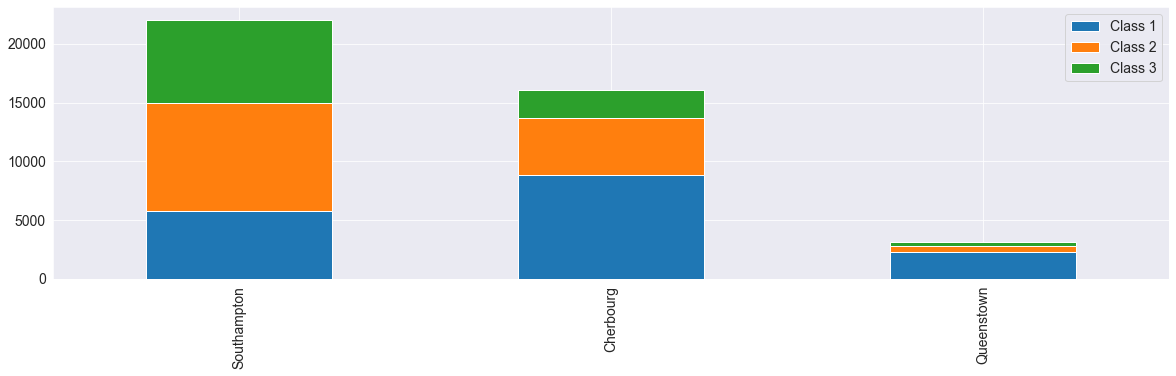

In [33]:
dtSur = dt.loc[dt['Survived']==1]
S_classes = dtSur.loc[dt['Embarked']=='S']
S_classes = pd.DataFrame(S_classes['Pclass'].value_counts())
S_classes = S_classes.reset_index()
S_classes.columns = ['S_class', 'Southampton']
S_classes = S_classes.sort_values(by='S_class')
S_classes = S_classes.reset_index()
#print(S_classes)
S_classes
C_classes = dtSur.loc[dt['Embarked']=='C']
C_classes = pd.DataFrame(C_classes['Pclass'].value_counts())
C_classes = C_classes.reset_index()
C_classes.columns = ['C_class', 'Cherbourg']
Q_classes = dtSur.loc[dt['Embarked']=='Q']
Q_classes = pd.DataFrame(Q_classes['Pclass'].value_counts())
Q_classes = Q_classes.reset_index()
Q_classes.columns = ['Q_class', 'Queenstown']
SumEmbClass = pd.concat([S_classes, C_classes, Q_classes], axis=1) 
#dt = df_train.drop(columns=['Ticket', 'Cabin', 'Fare'])
SumEmbClass = SumEmbClass.drop(columns=['index'])
print(SumEmbClass)
SumEmbClass = SumEmbClass.transpose()
SumEmbClass = SumEmbClass.drop(labels=['S_class', 'C_class', 'Q_class'], axis=0)
SumEmbClass = SumEmbClass.rename(columns={0:"Class 1", 1:"Class 2", 2:"Class 3"})

SumEmbClass.plot(kind="bar", stacked=True)

In [34]:
print('Данная гистограмма подтверждает, что больше выжило людей, которые садились в порту Southampton, при этом, большая часть выживших были пассажирами второго класса')

Данная гистограмма подтверждает, что больше выжило людей, которые садились в порту Southampton, при этом, большая часть выживших были пассажирами второго класса


Проверим зависимость распределения выживших пассажиров по полу и возрасту


<AxesSubplot:title={'center':'Age'}, xlabel='[Sex]'>

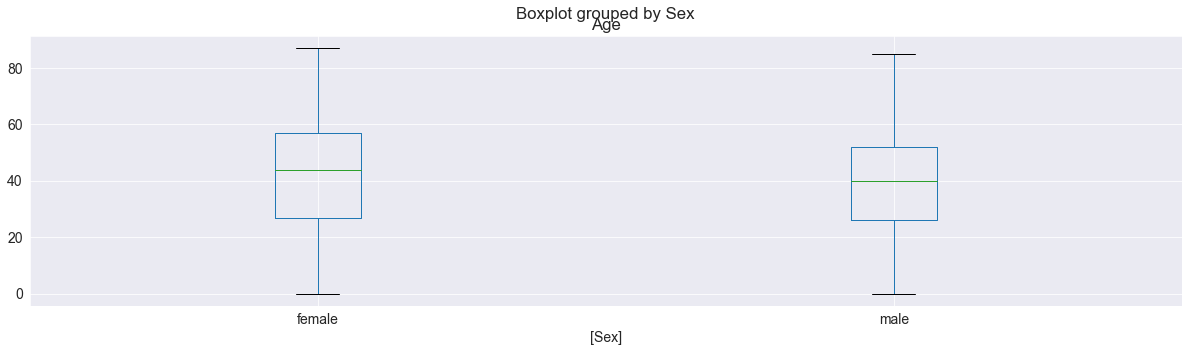

In [35]:
#Проверим зависимость распределения выживших пассажиров по полу и возрасту
print('Проверим зависимость распределения выживших пассажиров по полу и возрасту')
SurSexAge = dtSur.drop(columns=['Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Embarked'])
SurSexAge.boxplot(by="Sex")

In [36]:
print('Данная диаграмма показывет, что средний возраст выживших мужчины порядка 40 лет, а женщин - 45 лет.')

Данная диаграмма показывет, что средний возраст выживших мужчины порядка 40 лет, а женщин - 45 лет.


Text(0.5, 1.0, 'Зависимость выживаемости от наличия родных')

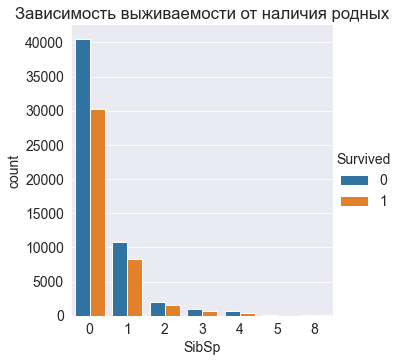

In [37]:
sns.catplot(x ='SibSp',  data=dt, hue='Survived', kind='count')
plt.title("Зависимость выживаемости от наличия родных")

Text(0.5, 1.0, 'Зависимость выживания от наличия родителей, детей')

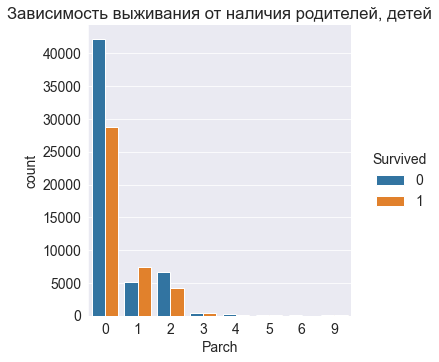

In [38]:
sns.catplot(x= 'Parch', data=dt, hue='Survived', kind='count')
plt.title("Зависимость выживания от наличия родителей, детей")